In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:

def get_countries_data():
    all_countries_endpoint = r"https://restcountries.eu/rest/v2/all"
    response = requests.get(all_countries_endpoint)
    if response.status_code == 200:
        data = response.json()[:200]   # just first 200 countries
        countries_df = pd.DataFrame(data)
        if countries_df.shape[0] > 0:
            return countries_df
    else:
        return False

# All countries data

In [3]:
countries_df = get_countries_data()

# How Many countries start with 'A'

In [4]:
countries_df[countries_df['name'].str.startswith('A')][['name']]

,name
0,Afghanistan
2,Albania
3,Algeria
4,American Samoa
5,Andorra
6,Angola
7,Anguilla
8,Antarctica
9,Antigua and Barbuda
10,Argentina


# Show countries by capital

In [14]:
countrybycapital = countries_df[['name', 'capital']]

In [15]:
countrybycapital

,name,capital
0,Afghanistan,Kabul
1,Åland Islands,Mariehamn
2,Albania,Tirana
3,Algeria,Algiers
4,American Samoa,Pago Pago
...,...,...
195,San Marino,City of San Marino
196,Sao Tome and Principe,São Tomé
197,Saudi Arabia,Riyadh
198,Senegal,Dakar


# How many countries of Africa 

In [5]:
africa = countries_df[countries_df['region'] == 'Africa'][['name', 'capital', 'borders', 'callingCodes']]
africa.shape[0]

46

# Export flags of Africa countries

In [19]:
def export_flag(index, url):
    alpha3code = url.split('.')[1][-3:]
    # from alpha3code to country code
    name = countries_df[['name', 'alpha3Code']][countries_df['alpha3Code'].str.lower() == alpha3code]['name'][index]
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join('pics', name + '.svg'), 'wb') as file:
            file.write(response.content)
    

In [ ]:
for index, url in enumerate(countries_df['flag']):
    export_flag(index, url)

In [23]:
regions = countries_df[['name', 'region']][countries_df['region'] != ''].groupby('region').count().rename(columns={"name": "Total"}).sort_values('Total', ascending=False)
print(regions)

          Total
region         
Americas     49
Africa       46
Europe       45
Asia         36
Oceania      21
Polar         1


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

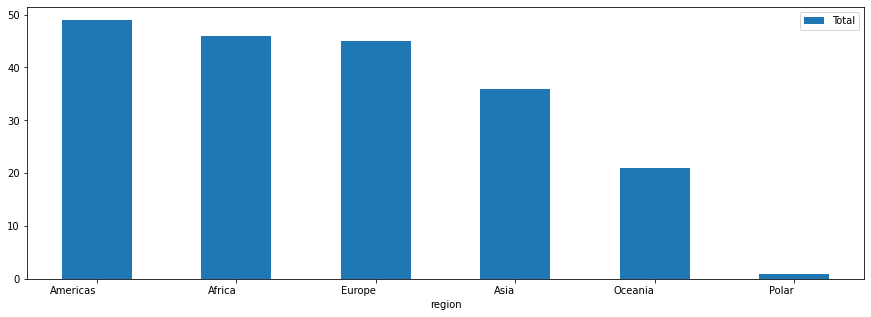

In [22]:
regions.plot(kind='bar', figsize=(15, 5))
plt.xticks(rotation=0, ha='right')